<a href="https://colab.research.google.com/github/p82maavd/Metaheuristicas/blob/main/Practica2Metaheuristica_Codificacion_Binaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [1]:
import random
import time
import matplotlib.pyplot as plt
import numpy as np


Evaluacion de la solucion

In [2]:
def evaluarSolucion(solucion, precios, pesos, pesoMax):
    precio = 0
    peso = 0
    for i in range(len(solucion)):
        precio += precios[i]*solucion[i]
        peso += pesos[i]*solucion[i]

    if peso > pesoMax:
        return 0
    else:
        return precio


Función de torneo

In [3]:
def torneo(poblacion,k):

    index_candidatos = []
    candidatos = []
    

    for i in range(k):

        index = random.randint(1,len(poblacion)-1)

        candidatos.append(poblacion[index][1])
        index_candidatos.append(index)

    mejor = max(candidatos)
    pos = candidatos.index(mejor)

    return poblacion[[index_candidatos[pos]][0]]


Funciones de cruce y mutación

In [4]:
def cruce(p1,p2):
  #cruce one-cut
    s1 = []
    s2 = []

    rn = random.randint(1,len(p1[0])-1)

    for i in range(len(p1[0])):

        if i < rn:
            s1.append(p1[0][i]) 
            s2.append(p2[0][i]) 
        else:
            s1.append(p2[0][i]) 
            s2.append(p1[0][i])

    return s1, s2


def mutar(m1):
        
    rn = random.randint(0,len(m1)-1)

    if m1[rn] == 1:
        m1[rn] = 0
    else:
        m1[rn] = 1

    return m1


Función aplicar operadores

In [5]:
def aplicarOperadoresGeneticos(poblacion, k, cProb, mProb):

    npoblacion = []

    while len(npoblacion) != len(poblacion):
    
        s = [0,0]

        #Seleccionar padres mediante torneo tamaño k
        padrea = torneo(poblacion,k); 
        padreb = torneo(poblacion,k);
 
        #Cruzar padres con probabilidad cProb
        if random.randint(1,100) <= cProb*100:
            s[0], s[1] = cruce(padrea,padreb)
        else:
            s[0] , s[1] = padrea[0], padreb[0]


        #Mutar padres con probabilidad mProb
        for i in range(0,2):
          if random.randint(1,100) <= mProb*100:
            s[i] = mutar(s[i])
         
         #añadir los hijos a la nnueva poblacion
        for i in range(0,2):
            if len(npoblacion) < len(poblacion):
                npoblacion.append([s[i],-1])

    return npoblacion #Devolver la nueva poblacion (sin evaluar)


Generador aleatorio

In [6]:
def generador(size, min, max):
    listElements = []
    for i in range(size):
        
        listElements.append(random.randint(min, max))
        
    return listElements



Calcular media de generacion

In [7]:
def mediaGen(pob):
  sum = 0

  for i in range(0,len(pob)-1):
    sum = sum + pob[i][1]


  return sum / len(pob)

Funcion para generacion inicial

In [8]:
def solucion_inicial(pesoMax,pesos,precios,l,numeroSoluciones):
        poblacion = []
    
        for i in range(numeroSoluciones):
            objetos = list(range(l))
            solucion = []
            peso = 0
            while peso < pesoMax:
                objeto = objetos[random.randint(0, len(objetos) - 1)]
                peso += pesos[objeto]
                if peso <= pesoMax:
                    solucion.append(objeto)
                    objetos.remove(objeto)
                if len(objetos)==0:
                  break

            s = []
            for i in range(l):
                s.append(0)
            for i in solucion:
                s[i] = 1
            poblacion.append([s,evaluarSolucion(s,precios,pesos,pesoMax)])
        return poblacion


¿Cómo se comporta este algoritmo a medida que cambiamos el número de
soluciones, generaciones, tamaño del torneo, probabilidad de cruce y probabilidad
de mutación? Amplía el problema con más objetos para ver el comportamiento
del algoritmo.


Cambiando numero de soluciones

5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
[[3250.39, 3513.325, 3810.025, 4126.3949999999995, 4295.5700000000015, 4191.6900000000005, 4366.460000000001, 4551.925, 4735.34, 4533.085, 4549.405, 4739.044999999999, 4925.375, 4737.955000000001, 4575.915, 4827.950000000001, 4832.875, 4705.564999999999, 4676.855, 4556.0650000000005, 4689.1, 4581.735, 4556.77, 4654.6, 4729.715, 4617.715, 4770.33, 4651.87, 4497.3550000000005, 4558.9349999999995, 4991.635, 5069.370000000001, 4924.76, 4795.470000000001, 4566.705, 4745.585, 4734.015, 4785.17, 4605.685, 4482.080000000001, 4410.630000000001, 4579.9, 4977.45, 4747.52, 4766.99, 4710.860000000001, 4590.185000000001, 4729.9400000000005, 4933.745000000001, 4755.9, 4895.985000000001, 4869.485000000001, 4856.925000000001, 4598.54, 4845.39, 4776.755000000001, 4694.35, 4911.435, 4698.799999999999, 4838.000000000001, 4755.4800000000005, 4755.460000000001, 4525.485, 4754.68, 4900.960000000001, 4756.095, 4756.000000000001, 4452.924999999999, 45

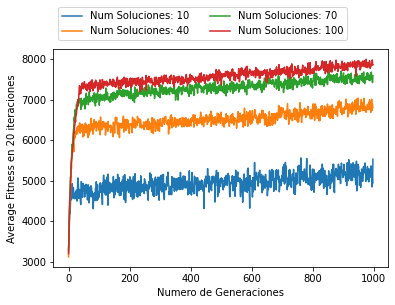

[0.0, 6450.949999999999, 6598.55, 6915.950000000001, 7066.05, 7307.700000000001, 7371.25, 7804.950000000001, 7969.750000000001, 8267.25, 8180.05, 8347.65, 8443.849999999999, 8475.600000000002, 8698.7, 8801.9, 8580.1, 8848.85, 8780.45, 8788.550000000001]


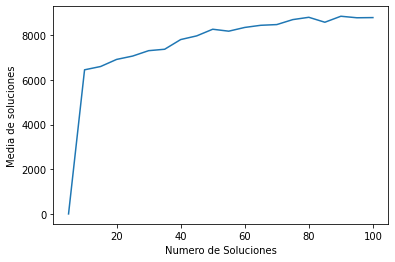

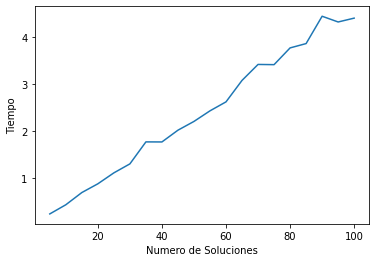

In [ ]:
#codigo cambiando numero de soluciones

def main():


    pesos = generador(100,20,100)
    precios = generador(100,50,500)

    pesoMax = 1000 #Peso máximo que se puede poner en la mochila
    numeroSoluciones = 25 #Tamaño de la poblacion
    maxGeneraciones = 1000 #Numero de generaciones
    k = 3 #Tamaño torneo selector de padres
    cProb = 0.7 #Probabilidad de cruce
    mProb = 0.1 #Probabilidad de mutacion
    tiempoList = []
    solucionList = [] 
    vectormedias=[]
    tam = range(5,101,5)
    for numeroSoluciones in tam:

      print(numeroSoluciones)
      mediatiempo = 0
      mediasolucion = 0
      mediasgen=[0]*(maxGeneraciones-1)
      numIt=20
      for j in range(0,numIt):

        tini=time.time() #iniciar temporizador
        l=len(pesos)

        ##Creamos n soluciones aleatorias que sean válidas
        poblacion = solucion_inicial(pesoMax,pesos,precios,l,numeroSoluciones)
        #fin generacion aleatoria

        it=1
        
        while it < maxGeneraciones:
            nSoluciones = aplicarOperadoresGeneticos(poblacion,k,cProb,mProb)
            #Modelo generacional
            
            poblacion = []
            
            best_solucion_por_generacion=[0,0]
            eval = 0

            for solucion in nSoluciones:
                eval=evaluarSolucion(solucion[0],precios,pesos,pesoMax)
            
                if eval > best_solucion_por_generacion[1]:
                  best_solucion_por_generacion[0]=solucion[0]
                  best_solucion_por_generacion[1]=eval
                poblacion.append([solucion[0],eval])
                

            if numeroSoluciones % 30 == 10:
              mediasgen[it-1]+=mediaGen(poblacion)
            it+=1

        tfi=time.time()

        tiempo=tfi-tini

#calcular medias de cada ejecución
        mediatiempo = mediatiempo + tiempo *((100/numIt)/100)      
        mediasolucion = mediasolucion + best_solucion_por_generacion[1] * ((100/numIt)/100)

#almacenar la media
      if numeroSoluciones % 30 == 10:
        vectormedias.append(mediasgen)
      tiempoList.append(mediatiempo)
      solucionList.append(mediasolucion)

#generar graficas

    for x in range(len(vectormedias[0])):
      vectormedias[0][x]/=numIt
      vectormedias[1][x]/=numIt
      vectormedias[2][x]/=numIt
      vectormedias[3][x]/=numIt
    print(vectormedias)
    fig, ax = plt.subplots()
    
    ax.plot(range(maxGeneraciones-1),vectormedias[0], label="Num Soluciones: 10" )
    ax.plot(range(maxGeneraciones-1),vectormedias[1], label="Num Soluciones: 40" )
    ax.plot(range(maxGeneraciones-1),vectormedias[2], label="Num Soluciones: 70" )
    ax.plot(range(maxGeneraciones-1),vectormedias[3], label="Num Soluciones: 100" )
    ejey= "Average Fitness en " + str(numIt) + ' iteraciones'
    ax.set_ylabel(ejey)
    ax.set_xlabel("Numero de Generaciones")
    plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", ncol=2)
    plt.show()

    fig, ax = plt.subplots()
    print(solucionList)
    ax.plot(tam,solucionList )
    ax.set_ylabel("Media de soluciones")
    ax.set_xlabel("Numero de Soluciones")
    plt.show()

    fig, ax = plt.subplots()
    ax.plot(tam, tiempoList )
    ax.set_ylabel("Tiempo")
    ax.set_xlabel("Numero de Soluciones")
    #plt.show()
    

if __name__ == "__main__":
    main()

Cambiando numero de generaciones

6000
8000
10000
12000
14000
[7044.05, 7040.6, 7101.55, 7094.950000000002, 7118.9]


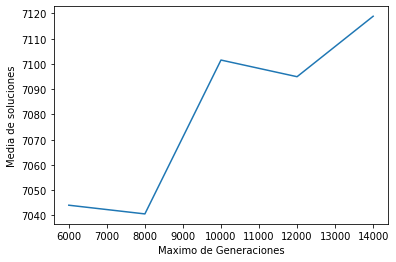

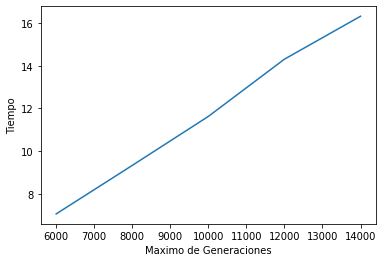

In [ ]:
#codigo cambiando numero de generaciones

def main():


    pesos = generador(50,20,100)
    precios = generador(50,50,500)

    pesoMax = 1000 #Peso máximo que se puede poner en la mochila
    numeroSoluciones = 45 #Tamaño de la poblacion, 45 porque es el mejor resultado obtenido en terminos de eficiencia
    maxGeneraciones = 1000 #Numero de generaciones
    k = 3 #Tamaño torneo selector de padres
    cProb = 0.7 #Probabilidad de cruce
    mProb = 0.1 #Probabilidad de mutacion
    tiempoList = []
    solucionList = [] 

    tam = range(6000,14001,2000)
    for maxGeneraciones in tam:

      print(maxGeneraciones)
      
      mediatiempo = 0
      mediasolucion = 0

      numIt=20
      for j in range(0,numIt):

        tini=time.time() #iniciar temporizador
        l=len(pesos)

        ##Creamos n soluciones aleatorias que sean válidas
        poblacion = solucion_inicial(pesoMax,pesos,precios,l,numeroSoluciones)
        #fin generacion aleatoria

        it=1
        
        while it < maxGeneraciones:
            nSoluciones = aplicarOperadoresGeneticos(poblacion,k,cProb,mProb)
            #Modelo generacional

         
            poblacion = []
            resultados=[]
            best_solucion_por_generacion=[0,0]
            eval = 0

            for solucion in nSoluciones:
                eval=evaluarSolucion(solucion[0],precios,pesos,pesoMax)
            
               
            
                if eval > best_solucion_por_generacion[1]:
                  best_solucion_por_generacion[0]=solucion[0]
                  best_solucion_por_generacion[1]=eval
                poblacion.append([solucion[0],eval])
                resultados.append(eval)
            it+=1
            
        tfi=time.time()

        tiempo=tfi-tini

#calcular medias de cada ejecución
        mediatiempo = mediatiempo + tiempo * ((100/numIt)/100)  
        mediasolucion = mediasolucion + best_solucion_por_generacion[1] * ((100/numIt)/100)

#almacenar la media
      tiempoList.append(mediatiempo)
      solucionList.append(mediasolucion)

#generar graficas

    fig, ax = plt.subplots()
    print(solucionList)
    ax.plot(tam,solucionList )
    ax.set_ylabel("Media de soluciones")
    ax.set_xlabel("Maximo de Generaciones")
    plt.show()

    fig, ax = plt.subplots()
    ax.plot(tam, tiempoList )
    ax.set_ylabel("Tiempo")
    ax.set_xlabel("Maximo de Generaciones")
    #plt.show()
    

if __name__ == "__main__":
    main()

Cambiando tamaño del torneo

2
3
4
5
6
7
8
9
10
[[3333.903333333333, 3442.6255555555554, 3710.3277777777776, 4052.8566666666675, 4272.562222222222, 4274.984444444444, 4493.264444444444, 4643.881111111111, 4582.797777777777, 4863.961111111112, 4873.676666666665, 4839.23888888889, 5061.331111111112, 4942.778888888888, 5234.74, 5309.7877777777785, 5242.67111111111, 5391.506666666666, 5604.01, 5437.072222222222, 5577.992222222222, 5587.161111111111, 5623.689999999999, 5804.282222222222, 5858.047777777778, 5807.496666666667, 6226.556666666666, 6017.561111111111, 6107.407777777778, 6103.296666666667, 6166.604444444445, 6001.503333333333, 5967.158888888889, 6159.322222222222, 6275.1866666666665, 6315.586666666668, 6279.726666666666, 6339.784444444445, 6357.48888888889, 6330.258888888888, 6250.660000000001, 6384.220000000001, 6417.188888888891, 6558.858888888889, 6487.824444444444, 6305.65111111111, 6433.16, 6643.5811111111125, 6786.3755555555545, 6393.9944444444445, 6613.0522222222235, 6490.794444444445, 6467.97111111111

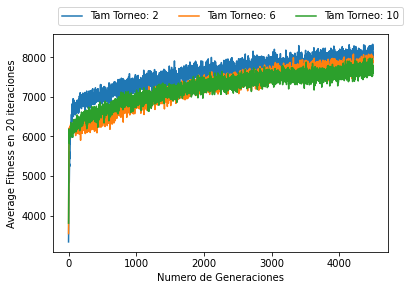

[9263.7, 9025.350000000002, 9006.699999999999, 8523.1, 8869.3, 9024.55, 8756.1, 8817.4, 8709.8]


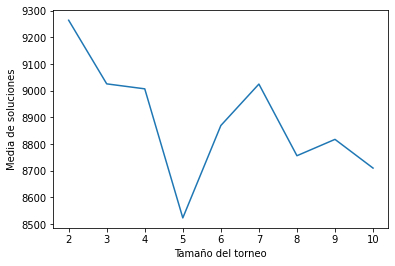

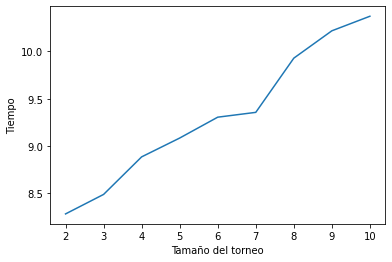

In [ ]:
#codigo cambiando el tamaño del torneo

def main():


    pesos = generador(100,20,100)
    precios = generador(100,50,500)

    pesoMax = 1000 #Peso máximo que se puede poner en la mochila
    numeroSoluciones = 45 #Tamaño de la poblacion, 45 porque es el mejor resultado obtenido en terminos de eficiencia
    maxGeneraciones = 4500 #Numero de generaciones 4500 porque es el mejor resultado obtenido en terminos de eficiencia
    k = 3 #Tamaño torneo selector de padres
    cProb = 0.7 #Probabilidad de cruce
    mProb = 0.1 #Probabilidad de mutacion
    tiempoList = []
    solucionList = [] 
    vectormedias=[]
    tam = range(2,11,1)
    for k in tam:

      print(k)
      #k = 3
      mediatiempo = 0
      mediasolucion = 0

      mediasgen=[0]*(maxGeneraciones-1)
      numIt=20
      for j in range(0,numIt):

        tini=time.time() #iniciar temporizador
        l=len(pesos)

        ##Creamos n soluciones aleatorias que sean válidas
        poblacion = solucion_inicial(pesoMax,pesos,precios,l,numeroSoluciones)
        #fin generacion aleatoria

        it=1

        while it < maxGeneraciones:
            nSoluciones = aplicarOperadoresGeneticos(poblacion,k,cProb,mProb)
            #Modelo generacional
            
            poblacion = []
            best_solucion_por_generacion=[0,0]
            eval = 0

            for solucion in nSoluciones:
                eval=evaluarSolucion(solucion[0],precios,pesos,pesoMax)
            
                if eval > best_solucion_por_generacion[1]:
                  best_solucion_por_generacion[0]=solucion[0]
                  best_solucion_por_generacion[1]=eval
                poblacion.append([solucion[0],eval])

            if k % 4 == 2:
              mediasgen[it-1]+=mediaGen(poblacion)
            it+=1

        tfi=time.time()

        tiempo=tfi-tini

#calcular medias de cada ejecución
        mediatiempo = mediatiempo + tiempo * ((100/numIt)/100)      
        mediasolucion = mediasolucion + best_solucion_por_generacion[1] * ((100/numIt)/100)

#almacenar la media
      if k % 4 == 2:
        vectormedias.append(mediasgen)
      tiempoList.append(mediatiempo)
      solucionList.append(mediasolucion)

#generar graficas

    for x in range(len(vectormedias[0])):
      vectormedias[0][x]/=numIt
      vectormedias[1][x]/=numIt
      vectormedias[2][x]/=numIt
    print(vectormedias)
    fig, ax = plt.subplots()
    ax.plot(range(maxGeneraciones-1),vectormedias[0], label="Tam Torneo: 2" )
    ax.plot(range(maxGeneraciones-1),vectormedias[1], label="Tam Torneo: 6" )
    ax.plot(range(maxGeneraciones-1),vectormedias[2], label="Tam Torneo: 10" )
    ejey= "Average Fitness en " + str(numIt) + ' iteraciones'
    ax.set_ylabel(ejey)
    ax.set_xlabel("Numero de Generaciones")
    plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", ncol=3)
    plt.show()

    fig, ax = plt.subplots()
    print(solucionList)
    ax.plot(tam,solucionList )
    ax.set_ylabel("Media de soluciones")
    ax.set_xlabel("Tamaño del torneo")
    plt.show()

    fig, ax = plt.subplots()
    ax.plot(tam, tiempoList )
    ax.set_ylabel("Tiempo")
    ax.set_xlabel("Tamaño del torneo")
    #plt.show()
    

if __name__ == "__main__":
    main()

Cambiando probabilidad de cruce

0.6
0.65
0.7
0.75
0.8
0.85
0.9
0.95
[[3232.054444444444, 3408.488888888889, 3773.294444444445, 3972.59, 4158.565555555556, 4368.8788888888885, 4645.2988888888885, 4803.6833333333325, 4992.068888888889, 4944.373333333331, 4984.4544444444455, 5187.788888888889, 5160.050000000001, 5176.898888888888, 5188.624444444445, 5350.318888888889, 5557.5566666666655, 5446.3822222222225, 5440.793333333333, 5466.831111111112, 5697.307777777778, 5948.691111111109, 5625.51, 5660.576666666669, 5740.814444444444, 5838.5311111111105, 5850.326666666666, 6092.757777777778, 5967.888888888889, 5838.191111111111, 6021.9511111111115, 6074.885555555555, 5836.552222222222, 5955.9877777777765, 5819.605555555556, 5992.23111111111, 6063.913333333334, 5923.402222222222, 5765.453333333333, 5897.9511111111115, 5939.136666666667, 5829.633333333332, 5975.993333333333, 5975.4400000000005, 5848.144444444444, 5987.035555555555, 5802.435555555556, 5859.982222222223, 5876.561111111112, 5972.584444444444, 6011.487777777778, 609

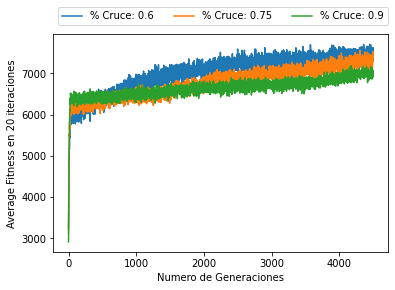

[8503.1, 8409.2, 8379.85, 8263.400000000001, 8220.45, 7847.099999999999, 7817.049999999999, 7545.35]


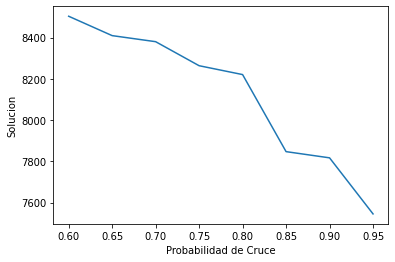

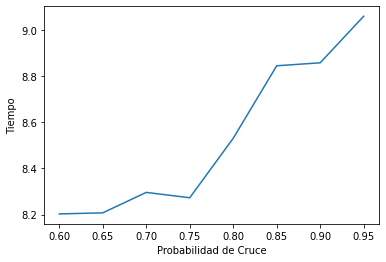

In [ ]:
#codigo cambiando cprob

def main():

    pesos = generador(100,20,100)
    precios = generador(100,50,500)

    pesoMax = 1000 #Peso máximo que se puede poner en la mochila
    numeroSoluciones = 45 #Tamaño de la poblacion, 45 porque es el mejor resultado obtenido en terminos de eficiencia
    maxGeneraciones = 4500 #Numero de generaciones 4500 porque es el mejor resultado obtenido en terminos de eficiencia
    k = 3 #Tamaño torneo selector de padres
    cProb = 0.7 #Probabilidad de cruce
    mProb = 0.1 #Probabilidad de mutacion
    tiempoList = []
    solucionList = [] 
    vectormedias=[]
    cProbs = [0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]
    for cProb in cProbs:

      print(cProb)

      mediatiempo = 0
      mediasolucion = 0

      mediasgen=[0]*(maxGeneraciones-1)
      numIt=20
      for j in range(0,numIt):

        tini=time.time() #iniciar temporizador
        l=len(pesos)

        ##Creamos n soluciones aleatorias que sean válidas
        poblacion = solucion_inicial(pesoMax,pesos,precios,l,numeroSoluciones)
        #fin generacion aleatoria

        it=1
        
        while it < maxGeneraciones:
            nSoluciones = aplicarOperadoresGeneticos(poblacion,k,cProb,mProb)
            #Modelo generacional
            
            poblacion = []
            best_solucion_por_generacion=[0,0]
            eval = 0

            for solucion in nSoluciones:
                eval=evaluarSolucion(solucion[0],precios,pesos,pesoMax)
            
                if eval > best_solucion_por_generacion[1]:
                  best_solucion_por_generacion[0]=solucion[0]
                  best_solucion_por_generacion[1]=eval
                poblacion.append([solucion[0],eval])
            if cProb==0.6 or cProb==0.75 or cProb==0.9:
              mediasgen[it-1]+=mediaGen(poblacion)
            it+=1

        tfi=time.time()

        tiempo=tfi-tini

#calcular medias de cada ejecución
        mediatiempo = mediatiempo + tiempo * ((100/numIt)/100)  
        mediasolucion = mediasolucion + best_solucion_por_generacion[1] * ((100/numIt)/100)

#almacenar la media
      if cProb==0.6 or cProb==0.75 or cProb==0.9:
        vectormedias.append(mediasgen)
      tiempoList.append(mediatiempo)
      solucionList.append(mediasolucion)

#generar graficas

    for x in range(len(vectormedias[0])):
      vectormedias[0][x]/=numIt
      vectormedias[1][x]/=numIt
      vectormedias[2][x]/=numIt
    print(vectormedias)
    fig, ax = plt.subplots()
    ax.plot(range(maxGeneraciones-1),vectormedias[0], label="% Cruce: 0.6" )
    ax.plot(range(maxGeneraciones-1),vectormedias[1], label="% Cruce: 0.75" )
    ax.plot(range(maxGeneraciones-1),vectormedias[2], label="% Cruce: 0.9" )
    ejey= "Average Fitness en " + str(numIt) + ' iteraciones'
    ax.set_ylabel(ejey)
    ax.set_xlabel("Numero de Generaciones")
    plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", ncol=3)
    plt.show()

    fig, ax = plt.subplots()
    print(solucionList)
    ax.plot(cProbs,solucionList )
    ax.set_ylabel("Solucion")
    ax.set_xlabel("Probabilidad de Cruce")
    plt.show()

    fig, ax = plt.subplots()
    ax.plot(cProbs, tiempoList )
    ax.set_ylabel("Tiempo")
    ax.set_xlabel("Probabilidad de Cruce")
    #plt.show()
    

if __name__ == "__main__":
    main()

Cambiando probabilidad de mutacion

0.05
0.1
0.15
0.2
0.25
0.3
[[3329.2333333333327, 3519.641111111111, 3734.403333333333, 4148.385555555556, 4474.323333333333, 4602.972222222223, 4662.756666666666, 5109.408888888889, 5297.372222222222, 5132.402222222222, 5136.7877777777785, 5431.424444444444, 5569.863333333335, 5412.385555555555, 5703.116666666667, 5566.946666666667, 5849.438888888888, 6003.752222222222, 5884.387777777778, 5922.7922222222205, 5952.977777777777, 5744.752222222222, 6012.012222222222, 5970.006666666666, 6234.692222222222, 6215.846666666665, 6086.551111111112, 6083.904444444444, 6093.239999999999, 6154.062222222221, 5994.102222222222, 5945.753333333333, 6010.150000000001, 5872.088888888889, 5956.474444444444, 5817.292222222222, 6061.961111111112, 6250.4, 6048.754444444443, 6197.116666666667, 6059.074444444444, 6040.585555555556, 6135.247777777779, 6003.996666666668, 6209.8066666666655, 6093.335555555556, 6277.533333333335, 6169.519999999999, 6047.773333333333, 6143.513333333334, 6089.488888888888, 6048.94, 

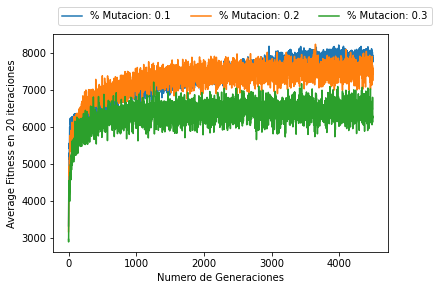

[8093.750000000001, 9016.899999999998, 9689.6, 9860.800000000001, 9960.7, 10038.7]


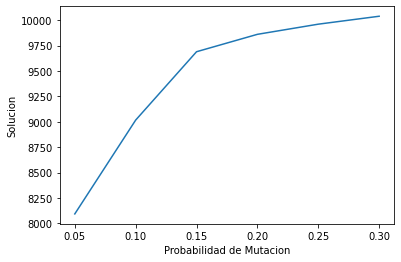

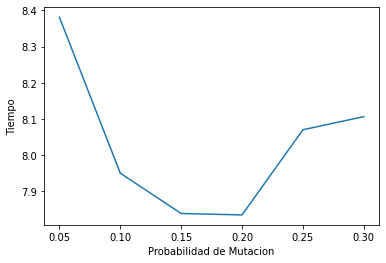

In [ ]:
#codigo cambiando mprob

def main():

    pesos = generador(100,20,100)
    precios = generador(100,50,500)

    pesoMax = 1000 #Peso máximo que se puede poner en la mochila
    numeroSoluciones = 45 #Tamaño de la poblacion, 45 porque es el mejor resultado obtenido en terminos de eficiencia
    maxGeneraciones = 4500 #Numero de generaciones 4500 porque es el mejor resultado obtenido en terminos de eficiencia
    k = 3 #Tamaño torneo selector de padres
    cProb = 0.6 #Probabilidad de cruce
    mProb = 0.1 #Probabilidad de mutacion
    tiempoList = []
    solucionList = [] 
    vectormedias=[]
    mProbs =[0.05,0.1,0.15,0.2,0.25,0.3]
    for mProb in mProbs:

      print(mProb)
      #k = 3
      mediatiempo = 0
      mediasolucion = 0

      mediasgen=[0]*(maxGeneraciones-1)
      numIt=20
      for j in range(0,numIt):

        tini=time.time() #iniciar temporizador
        l=len(pesos)

        ##Creamos n soluciones aleatorias que sean válidas
        poblacion = solucion_inicial(pesoMax,pesos,precios,l,numeroSoluciones)
        #fin generacion aleatoria

        it=1

        while it < maxGeneraciones:
            nSoluciones = aplicarOperadoresGeneticos(poblacion,k,cProb,mProb)
            #Modelo generacional
            
            poblacion = []
            
            best_solucion_por_generacion=[0,0]
            eval = 0

            for solucion in nSoluciones:
                eval=evaluarSolucion(solucion[0],precios,pesos,pesoMax)
            
                if eval > best_solucion_por_generacion[1]:
                  best_solucion_por_generacion[0]=solucion[0]
                  best_solucion_por_generacion[1]=eval
                poblacion.append([solucion[0],eval])
                
            if mProb*100 % 2 == 0:
              mediasgen[it-1]+=mediaGen(poblacion)
            it+=1
            

        tfi=time.time()

        tiempo=tfi-tini

#calcular medias de cada ejecución
        mediatiempo = mediatiempo + tiempo * ((100/numIt)/100)
        mediasolucion = mediasolucion + best_solucion_por_generacion[1] * ((100/numIt)/100)

#almacenar la media

      if mProb*100 % 2 == 0:
        vectormedias.append(mediasgen)
      tiempoList.append(mediatiempo)
      solucionList.append(mediasolucion)

#generar graficas


    for x in range(len(vectormedias[0])):
      vectormedias[0][x]/=numIt
      vectormedias[1][x]/=numIt
      vectormedias[2][x]/=numIt
    print(vectormedias)
    fig, ax = plt.subplots()

    ax.plot(range(maxGeneraciones-1),vectormedias[0], label="% Mutacion: 0.1" )
    ax.plot(range(maxGeneraciones-1),vectormedias[1], label="% Mutacion: 0.2" )
    ax.plot(range(maxGeneraciones-1),vectormedias[2], label="% Mutacion: 0.3" )
    ejey= "Average Fitness en " + str(numIt) + ' iteraciones'
    ax.set_ylabel(ejey)
    ax.set_xlabel("Numero de Generaciones")
    plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", ncol=3)
    plt.show()
    
    fig, ax = plt.subplots()
    print(solucionList)
    ax.plot(mProbs,solucionList )
    ax.set_ylabel("Solucion")
    ax.set_xlabel("Probabilidad de Mutacion")
    plt.show()

    fig, ax = plt.subplots()
    ax.plot(mProbs, tiempoList )
    ax.set_ylabel("Tiempo")
    ax.set_xlabel("Probabilidad de Mutacion")
    #plt.show()
    

if __name__ == "__main__":
    main()

Elitismo

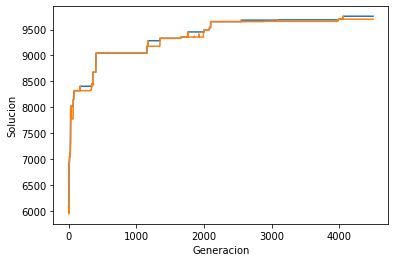

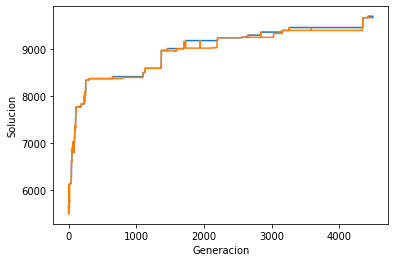

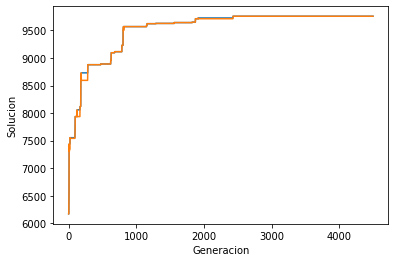

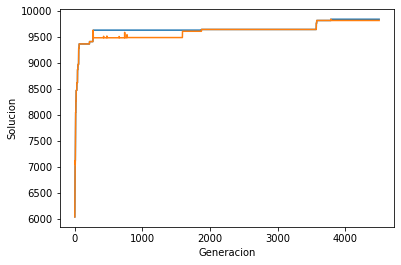

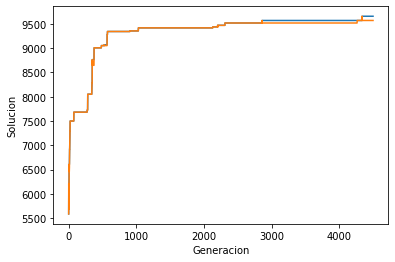

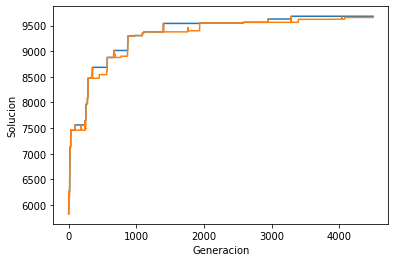

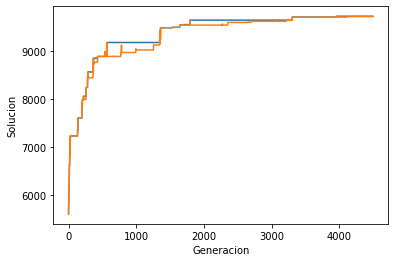

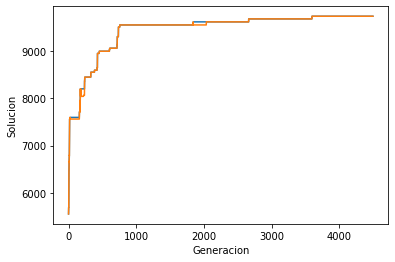

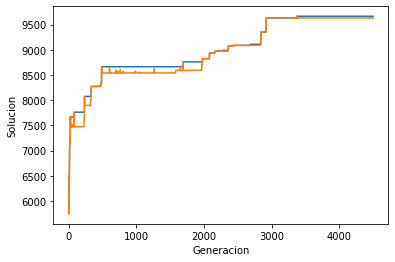

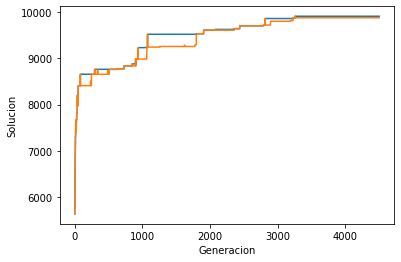

La mejor solucion obtenida es:  [[0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0], 9906]


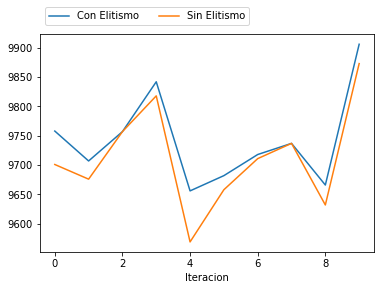

In [10]:
def main():

    pesos = generador(100,20,100)

    precios = generador(100,50,500)


    pesoMax = 1000 #Peso máximo que se puede poner en la mochila
    numeroSoluciones = 45 #Tamaño de la poblacion
    maxGeneraciones = 4500 #Numero de generaciones
    k = 3 #Tamaño torneo selector de padres
    cProb = 0.65 #Probabilidad de cruce
    mProb = 0.2 #Probabilidad de mutacion
    tiempoList = []
    solucionList = [] 
      
    mediatiempo = 0
    mediasolucion = 0

    conelitismo=[]
    sinelitismo=[]
    its=[0,1,2,3,4,5,6,7,8,9]
    gens=range(maxGeneraciones-1)

    mediasgen=[0]*(maxGeneraciones-1)
    numIt=10
    for j in range(0,numIt):

        tini=time.time()
        l=len(pesos)
        ##Creamos n soluciones aleatorias que sean válidas
        
        bests=[]
        new_best=[]
        
        poblacion=solucion_inicial(pesoMax,pesos,precios,l,numeroSoluciones)

        it=1
        best_solucion=[0,0]
        
        while it < maxGeneraciones:
            nSoluciones = aplicarOperadoresGeneticos(poblacion,k,cProb,mProb)
            #Modelo generacional

     
            poblacion = []

            best_solucion_por_generacion=[0,0]
            for solucion in nSoluciones:
                eval=evaluarSolucion(solucion[0],precios,pesos,pesoMax)
                if eval > best_solucion[1]:
                  best_solucion[0]=solucion[0]
                  best_solucion[1]=eval
                if eval > best_solucion_por_generacion[1]:
                  best_solucion_por_generacion[0]=solucion[0]
                  best_solucion_por_generacion[1]=eval
                poblacion.append([solucion[0],eval])

            it+=1
            bests.append(best_solucion[1])
            new_best.append(best_solucion_por_generacion[1])

            ##Guardar best_solucion[1] para mostrarlo en grafica
        fig, ax = plt.subplots()
    
        ax.plot(gens, bests)
        ax.set_ylabel("Solucion")
        ax.set_xlabel("Iteracion")
            #plt.show()

        ax.plot(gens,new_best )

        ax.set_xlabel("Generacion")
        plt.show()
    

        tfi=time.time()

        tiempo=tfi-tini
        sinelitismo.append(best_solucion_por_generacion[1])
        conelitismo.append(best_solucion[1])

    print("La mejor solucion obtenida es: ",best_solucion)


    
    
    fig, ax = plt.subplots()
    
    ax.plot(its, conelitismo, label="Con Elitismo")
    
    ax.set_xlabel("Iteracion")
    #plt.show()

    #fig, ax = plt.subplots()
    ax.plot(its,sinelitismo, label="Sin Elitismo")
    
    ax.set_xlabel("Iteracion")
    plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", ncol=2)
    #plt.show()
    

if __name__ == "__main__":
    main()

Prueba Grafico Probabilidad Solucion Optima

Numero de Materiales:  10
Soluciones de cada iteracion:  [2534, 2534, 2534, 2534, 2534, 2534, 2534, 2534, 2534, 2534, 2534, 2534, 2534, 2534, 2534, 2534, 2534, 2534, 2534, 2534, 2534, 2534, 2534, 2534, 2534, 2534, 2534, 2534, 2534, 2534]


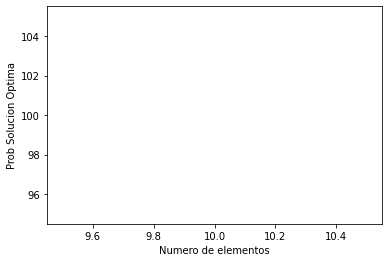

Numero de Materiales:  15
Soluciones de cada iteracion:  [3744, 3744, 3744, 3744, 3744, 3566, 3715, 3744, 3744, 3566, 3744, 3744, 3744, 3744, 3744, 3744, 3715, 3744, 3744, 3744, 3744, 3744, 3744, 3744, 3744, 3744, 3744, 3744, 3566, 3744]


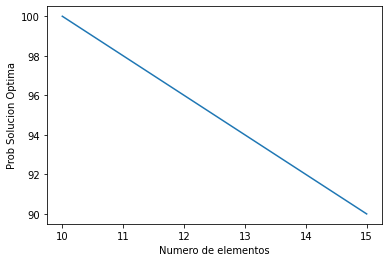

Numero de Materiales:  20
Soluciones de cada iteracion:  [3940, 3901, 3872, 3901, 3872, 3900, 3694, 3701, 3901, 4004, 3874, 3940, 3701, 3874, 3901, 3940, 3900, 3872, 3901, 3940, 3872, 3872, 3940, 3727, 3701, 3901, 3587, 3870, 3900, 3865]


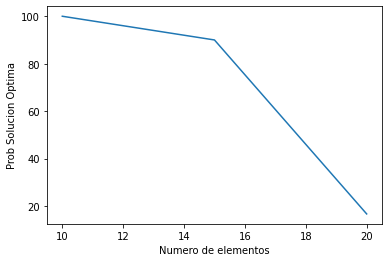

Numero de Materiales:  25
Soluciones de cada iteracion:  [2848, 2620, 2924, 2657, 2780, 2602, 2708, 2787, 2646, 2747, 2876, 2849, 2823, 2708, 2678, 2794, 2562, 2689, 2762, 2714, 2896, 2924, 2646, 2780, 2896, 2896, 2819, 2884, 2765, 2768]


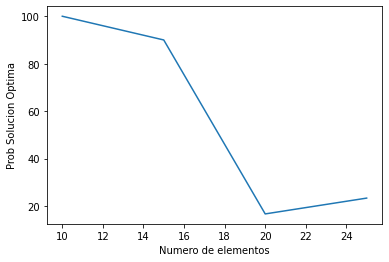

Numero de Materiales:  30
Soluciones de cada iteracion:  [3623, 3661, 3662, 3444, 3505, 3600, 3518, 3755, 3481, 3629, 3604, 3647, 3549, 3422, 3482, 3602, 3755, 3593, 3677, 3677, 3570, 3583, 3435, 3631, 3477, 3582, 3475, 3813, 3545, 3708]


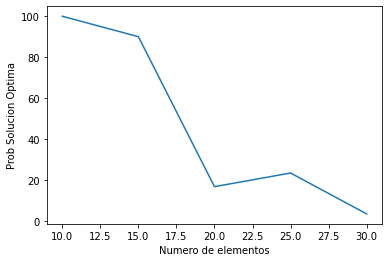

Numero de Materiales:  35
Soluciones de cada iteracion:  [4393, 4103, 4051, 4270, 4424, 4310, 4238, 4292, 4116, 4294, 4311, 4328, 3593, 4378, 4296, 4509, 4294, 3898, 4149, 4314, 4188, 4180, 4178, 4358, 4226, 4197, 3844, 4285, 4201, 4141]


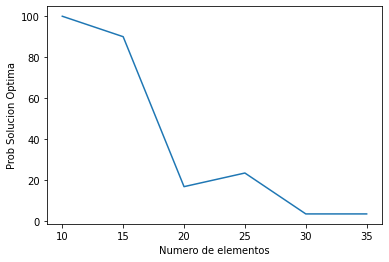

Numero de Materiales:  40
Soluciones de cada iteracion:  [4470, 4714, 4841, 5035, 5330, 4946, 4811, 4966, 4879, 4981, 4946, 4956, 4837, 4793, 4617, 4839, 4776, 4866, 5139, 4897, 4932, 4388, 5235, 4739, 4737, 5111, 4482, 5198, 5205, 4952]


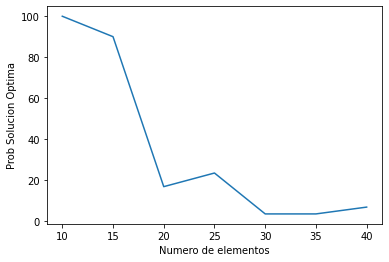

Numero de Materiales:  45
Soluciones de cada iteracion:  [4623, 4686, 4783, 4662, 4667, 4606, 4897, 4529, 4472, 4140, 4565, 4966, 4626, 4317, 4496, 4333, 4619, 4669, 4829, 4700, 4620, 4286, 4703, 4908, 4565, 4679, 4567, 4125, 4490, 4600]


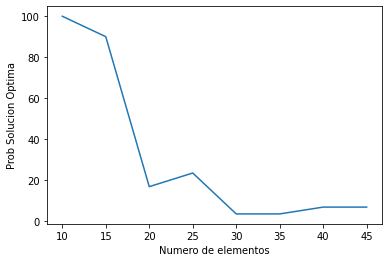

Numero de Materiales:  50
Soluciones de cada iteracion:  [3969, 4110, 3730, 3622, 3785, 4423, 4178, 4283, 4427, 3852, 4142, 4321, 3953, 4033, 4582, 4061, 4185, 3889, 3969, 4405, 3929, 4574, 4199, 4209, 4068, 4201, 4070, 3957, 3628, 4263]


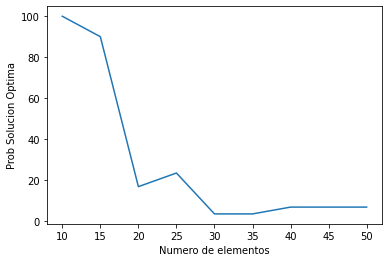

Numero de Materiales:  55
Soluciones de cada iteracion:  [4320, 3868, 4366, 4092, 3751, 3774, 3594, 3869, 4083, 3918, 4302, 3754, 4039, 4237, 4540, 4217, 3803, 3913, 3994, 4183, 3886, 3817, 4418, 4101, 4107, 4622, 4322, 4233, 3484, 4421]


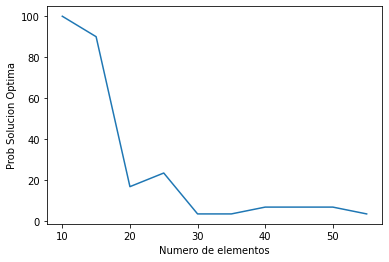

Numero de Materiales:  60
Soluciones de cada iteracion:  [4753, 4645, 4292, 4110, 4204, 4403, 4825, 4235, 4644, 4441, 4758, 3882, 4871, 4421, 4465, 4233, 4406, 4369, 4425, 4413, 4412, 4753, 3863, 4221, 4876, 3989, 4732, 3788, 4593, 4397]


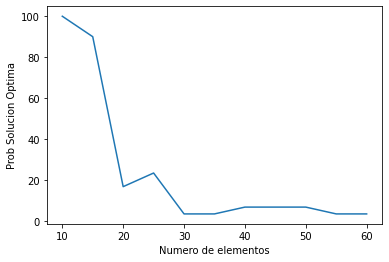

Numero de Materiales:  65
Soluciones de cada iteracion:  [3863, 4037, 3283, 4218, 3869, 3965, 4217, 4199, 4295, 3245, 4121, 3561, 3908, 3623, 4245, 3648, 4091, 3671, 3749, 3925, 3685, 3786, 4443, 3999, 4180, 3978, 3869, 4292, 4435, 3593]


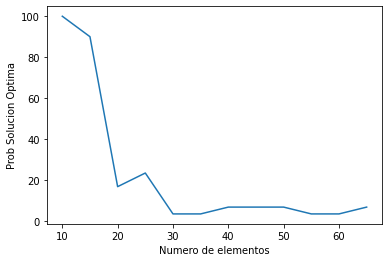

Numero de Materiales:  70
Soluciones de cada iteracion:  [3689, 4495, 3323, 4019, 4377, 4120, 4389, 4276, 3213, 3977, 3949, 4438, 4020, 3833, 3996, 4336, 3939, 3956, 4604, 4178, 4284, 3784, 4706, 4285, 4524, 4464, 4405, 4307, 3646, 3294]


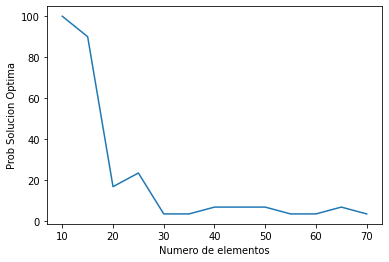

Numero de Materiales:  75
Soluciones de cada iteracion:  [3601, 3297, 3433, 3571, 3698, 3290, 4163, 3685, 3362, 3175, 2606, 3441, 3666, 3740, 3862, 3258, 2979, 3565, 3048, 3260, 3618, 3474, 3196, 3472, 3419, 3730, 3645, 3747, 3509, 3913]


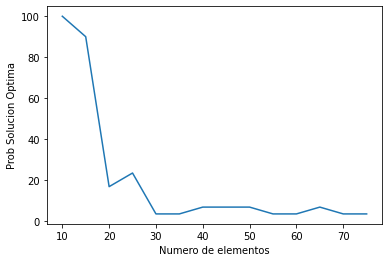

Numero de Materiales:  80
Soluciones de cada iteracion:  [4428, 5007, 4498, 4916, 5092, 4024, 4315, 4713, 4023, 3904, 4681, 4526, 4644, 4129, 4778, 3560, 4103, 4344, 4807, 4480, 4121, 3869, 4068, 4826, 4493, 4903, 5171, 4523, 4753, 3522]


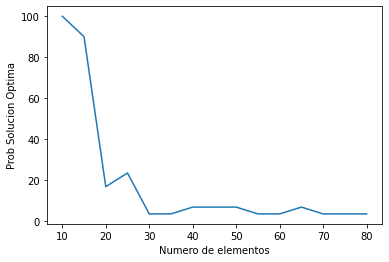

Numero de Materiales:  85
Soluciones de cada iteracion:  [4697, 3784, 4025, 4538, 4342, 3419, 3857, 3855, 3005, 4261, 3770, 4247, 4019, 3883, 3925, 3968, 4290, 4249, 4485, 3121, 4265, 3643, 3984, 4523, 4249, 4369, 3888, 4600, 4380, 4184]


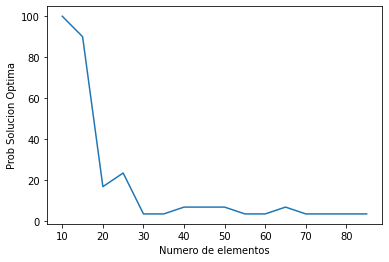

Numero de Materiales:  90
Soluciones de cada iteracion:  [4159, 3715, 3307, 3569, 3846, 3968, 3629, 3978, 3246, 3688, 4714, 4208, 4076, 4225, 3858, 3580, 4150, 3429, 3823, 3449, 3753, 3859, 4059, 3793, 3741, 3722, 3892, 3840, 3858, 4192]


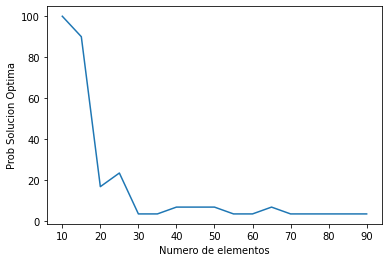

Numero de Materiales:  95
Soluciones de cada iteracion:  [3855, 3180, 3827, 3724, 3521, 4100, 3714, 3838, 3621, 3499, 2842, 3373, 3314, 3824, 3668, 3458, 3626, 3302, 3861, 3527, 3921, 3482, 3229, 3068, 2914, 3354, 3994, 3695, 4445, 3036]


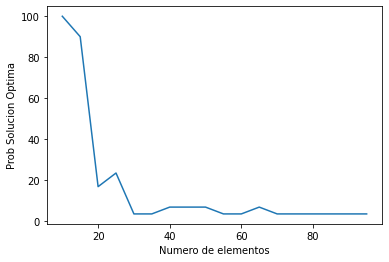

Numero de Materiales:  100
Soluciones de cada iteracion:  [3148, 3257, 3912, 4187, 3911, 3367, 3034, 3521, 3570, 3494, 3536, 3460, 3681, 3411, 3880, 3280, 3107, 4093, 3406, 3172, 3859, 3632, 3608, 2790, 4040, 3697, 4076, 3673, 3839, 3018]


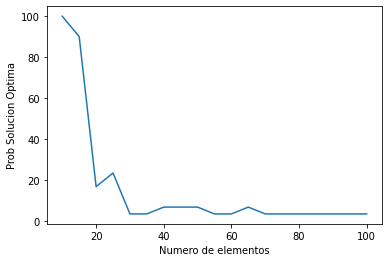

In [ ]:
#codigo cambiando numero de materiales

def main():
    probList=[]
    for numMateriales in range(10,101,5):
      print("Numero de Materiales: ", numMateriales)
      pesos = generador(numMateriales,50,200)
      precios = generador(numMateriales,50,500)

      pesoMax = 1000 #Peso máximo que se puede poner en la mochila
      numeroSoluciones = 25 #Tamaño de la poblacion
      maxGeneraciones = 5000 #Numero de generaciones ----------
      k = 5 #Tamaño torneo selector de padres
      cProb = 0.7 #Probabilidad de cruce
      mProb = 0.1 #Probabilidad de mutacion
      iteraciones = []
      solucionList = [] 
      numIt=30
      for i in range(numIt):
        
        tini=time.time() #iniciar temporizador
        l=len(pesos)

        ##Creamos n soluciones aleatorias que sean válidas
        poblacion = solucion_inicial(pesoMax,pesos,precios,l,numeroSoluciones)
        #fin generacion aleatoria

        it=1
        #best_solucion=[0,0]
        while it < maxGeneraciones:
                nSoluciones = aplicarOperadoresGeneticos(poblacion,k,cProb,mProb)
                #Modelo generacional
                
                poblacion = []
                resultados=[]
                best_solucion_por_generacion=[0,0]
                
                for solucion in nSoluciones:
                    eval=evaluarSolucion(solucion[0],precios,pesos,pesoMax)
                
                    if eval > best_solucion_por_generacion[1]:
                      best_solucion_por_generacion[0]=solucion[0]
                      best_solucion_por_generacion[1]=eval
                
                    poblacion.append([solucion[0],eval])
                    resultados.append(eval)
                
                iteraciones.append(it)
                it+=1
                
      #generar graficas
        tfi=time.time()

        tiempo=tfi-tini
        solucionList.append(best_solucion_por_generacion[1])
      best_solucion=0
      prob=0
      print("Soluciones de cada iteracion: ",solucionList)
      for x in solucionList:
        if x > best_solucion:
          best_solucion=x
          prob=1
          continue
        if x == best_solucion or abs(x-best_solucion)<best_solucion*0.02:
          prob+=1
      probList.append(prob*(100/numIt))
      fig, ax = plt.subplots()
      
      ax.plot(range(10,numMateriales+1,5),probList )
      ax.set_ylabel("Prob Solucion Optima")
      ax.set_xlabel("Numero de elementos")
      plt.show()
    
    
if __name__ == "__main__":
    main()

Poblacion Inicial Sin restricciones

In [ ]:
def main():

    pesos = generador(100,20,100)
    precios = generador(100,50,500)

    pesoMax = 1000 
    numeroSoluciones = 45 
    maxGeneraciones = 4500 
    k = 3 
    cProb = 0.65 
    mProb = 0.2 
    tiempoList = []
    solucionList = [] 
      #k = 3
    mediatiempo = 0
    mediasolucion = 0

    poblacionNoValida = []
    l=len(pesos)
    for n in range(numeroSoluciones):
      individuo = generador(len(pesos),0,1)
      poblacionNoValida.append([individuo, evaluarSolucion(individuo,precios,pesos,pesoMax)])
    poblacionValida=solucion_inicial(pesoMax,pesos,precios,l,numeroSoluciones)
    solucionListValida=[]
    solucionListNoValida=[]
    for j in range(0,10):
        print("Iteracion: ",j)

        tini=time.time() 
      
          #fin generacion aleatoria

        it=1
         
        while it < maxGeneraciones:
            nSoluciones = aplicarOperadoresGeneticos(poblacionValida,k,cProb,mProb)
            nSoluciones2 = aplicarOperadoresGeneticos(poblacionNoValida,k,cProb,mProb)
                #Modelo generacional
            poblacionValida = []
            poblacionNoValida = []
            best_solucion_por_generacion_valida=[0,0]
            
            for solucion in nSoluciones:
                eval=evaluarSolucion(solucion[0],precios,pesos,pesoMax)
                
                if eval > best_solucion_por_generacion_valida[1]:
                  best_solucion_por_generacion_valida[0]=solucion[0]
                  best_solucion_por_generacion_valida[1]=eval
                poblacionValida.append([solucion[0],eval])
                
            best_solucion_por_generacion_no_valida=[0,0]
            for solucion in nSoluciones2:
                eval=evaluarSolucion(solucion[0],precios,pesos,pesoMax)
                
                if eval > best_solucion_por_generacion_no_valida[1]:
                  best_solucion_por_generacion_no_valida[0]=solucion[0]
                  best_solucion_por_generacion_no_valida[1]=eval
                poblacionNoValida.append([solucion[0],eval])

            it+=1
                

    #calcular medias de cada ejecución
        
        solucionListValida.append(best_solucion_por_generacion_valida[1])
        solucionListNoValida.append(best_solucion_por_generacion_no_valida[1])


    #generar graficas

    fig, ax = plt.subplots()
    ax.plot(range(0,10,1),solucionListNoValida, label="Solucion Aleatoria" )
    ax.set_ylabel("Media de soluciones")
    ax.set_xlabel("Iteraciones")
    ax.set_title("Peso Max 1000")
   
    ax.plot(range(0,10,1), solucionListValida, label = "Solucion Valida" )
    plt.legend(bbox_to_anchor=(0.05,1.1,1,0.2), loc="lower left", ncol=2)
    plt.show()

if __name__ == "__main__":
    main()